# upload file

上传文件到hadoop

In [40]:
from glob import glob
from tqdm import tqdm
from hdfs import InsecureClient


In [41]:
patt="follower/cpu1/test*/raft/node1/region000100000000/statemachine.log"
# test 1 - test 20
paths = glob(patt)
paths.sort(key=lambda x: int(x.split('/')[2][4:]))

In [42]:
!head follower/cpu1/test1/raft/node1/region000100000000/statemachine.log

operator,term,index,raftTime,prevApplyTime,valueSize
InsertRowNode,1,1,1685462268278,1685462268525,100
InsertRowNode,1,3,1685462268829,1685462268840,100
InsertRowNode,1,5,1685462270667,1685462270676,100
InsertRowNode,1,7,1685462271355,1685462271362,100
InsertRowNode,1,9,1685462271404,1685462271410,100
InsertRowNode,1,11,1685462271489,1685462271495,100
InsertRowNode,1,13,1685462271588,1685462271594,100
InsertRowNode,1,15,1685462272401,1685462272407,100
InsertRowNode,1,17,1685462272506,1685462272512,100


In [43]:
client = InsecureClient("http://localhost:9870", user="jimx")
client.list("/")

['raftlog', 'user']

In [44]:
client.makedirs("/raftlog/cpu")

In [45]:
client.list("/raftlog")

['cpu']

In [46]:
# follower/cpu1/test1/raft/node1/region000100000000/statemachine.log -> /raftlog/cpu/test1/statemachine.log
for p in tqdm(paths):
    client.makedirs("/raftlog/cpu/"+p.split('/')[2])
    client.upload("/raftlog/cpu/"+p.split('/')[2]+"/statemachine.log", p)

  0%|          | 0/19 [00:00<?, ?it/s]


HdfsError: Remote path '/raftlog/cpu/test1/statemachine.log' already exists.

In [ ]:
list(client.walk("/raftlog/cpu",depth=2))

[('/raftlog/cpu',
  ['test1',
   'test10',
   'test11',
   'test12',
   'test13',
   'test14',
   'test16',
   'test17',
   'test18',
   'test19',
   'test2',
   'test20',
   'test3',
   'test4',
   'test5',
   'test6',
   'test7',
   'test8',
   'test9'],
  []),
 ('/raftlog/cpu/test1', [], ['statemachine.log']),
 ('/raftlog/cpu/test10', [], ['statemachine.log']),
 ('/raftlog/cpu/test11', [], ['statemachine.log']),
 ('/raftlog/cpu/test12', [], ['statemachine.log']),
 ('/raftlog/cpu/test13', [], ['statemachine.log']),
 ('/raftlog/cpu/test14', [], ['statemachine.log']),
 ('/raftlog/cpu/test16', [], ['statemachine.log']),
 ('/raftlog/cpu/test17', [], ['statemachine.log']),
 ('/raftlog/cpu/test18', [], ['statemachine.log']),
 ('/raftlog/cpu/test19', [], ['statemachine.log']),
 ('/raftlog/cpu/test2', [], ['statemachine.log']),
 ('/raftlog/cpu/test20', [], ['statemachine.log']),
 ('/raftlog/cpu/test3', [], ['statemachine.log']),
 ('/raftlog/cpu/test4', [], ['statemachine.log']),
 ('/raftlog/

# data stream

In [ ]:
from hdfs import InsecureClient
client = InsecureClient("http://localhost:9870", user="jimx")
client.status("/raftlog/cpu/test1/statemachine.log")

{'accessTime': 1701054749177,
 'blockSize': 134217728,
 'childrenNum': 0,
 'fileId': 16418,
 'group': 'supergroup',
 'length': 2851024,
 'modificationTime': 1701054749763,
 'owner': 'jimx',
 'pathSuffix': '',
 'permission': '644',
 'replication': 1,
 'storagePolicy': 0,
 'type': 'FILE'}

In [ ]:
client.list("/raftlog/cpu/")

['test1',
 'test10',
 'test11',
 'test12',
 'test13',
 'test14',
 'test16',
 'test17',
 'test18',
 'test19',
 'test2',
 'test20',
 'test3',
 'test4',
 'test5',
 'test6',
 'test7',
 'test8',
 'test9']

In [ ]:
with client.read('/raftlog/cpu/test1/statemachine.log', encoding='utf-8') as reader:
    content = reader.read()

# redis load

In [1]:
from redis import StrictRedis

In [45]:
redis = StrictRedis(host="localhost", port=6379, decode_responses=True, db=1)

In [58]:
redis.dbsize()

639

In [61]:
redis.keys()[:5]

['2023-11-27 16:49:06',
 '2023-11-27 16:48:45',
 '2023-11-27 16:57:09',
 '2023-11-27 17:12:48',
 '2023-11-27 16:41:42']

In [62]:
redis.get("2023-11-27 16:49:06")

'3.8685440339871886'

In [42]:
# redis.flushall()

True

In [52]:
redis.dbsize()

639

In [54]:
import matplotlib.pyplot as plt
import datetime

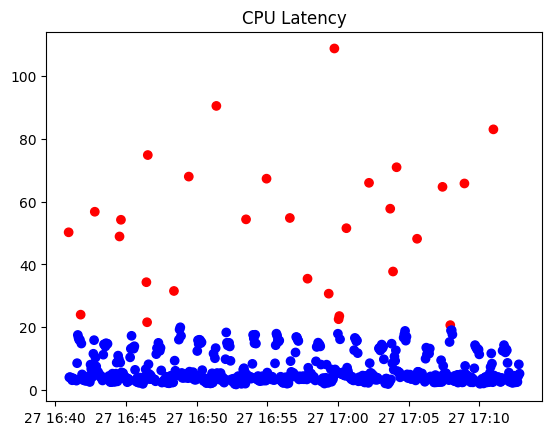

In [57]:
# Assuming `redis` is your redis client
keys = redis.keys()
values = [redis.get(key) for key in keys]

# Convert keys to datetime and values to float
dates = [datetime.datetime.strptime(key, '%Y-%m-%d %H:%M:%S') for key in keys]
values = [float(value) for value in values]

# Create color list
colors = ['red' if value > 20 else 'blue' for value in values]

# Create scatter plot
plt.scatter(dates, values, c=colors)
plt.title('CPU Latency')
plt.show()